In [1]:
using NeuralPDE, Lux, ModelingToolkit, Optimization, OptimizationOptimisers
import ModelingToolkit: Interval, infimum, supremum

@parameters x y
@variables u(..)
Dxx = Differential(x)^2
Dyy = Differential(y)^2

# 2D PDE
eq = Dxx(u(x, y)) + Dyy(u(x, y)) ~ -sin(pi * x) * sin(pi * y)

# Boundary conditions
bcs = [u(0, y) ~ 0.0, u(1, y) ~ 0,
    u(x, 0) ~ 0.0, u(x, 1) ~ 0]
# Space and time domains
domains = [x ∈ Interval(0.0, 1.0),
    y ∈ Interval(0.0, 1.0)]
# Discretization
dx = 0.1

loss = []

# Neural network
dim = 2 # number of dimensions
chain = Lux.Chain(Dense(dim, 16, Lux.σ), Dense(16, 16, Lux.σ), Dense(16, 1))

discretization = PhysicsInformedNN(chain, QuadratureTraining())

@named pde_system = PDESystem(eq, bcs, domains, [x, y], [u(x, y)])
prob = discretize(pde_system, discretization)

callback = function (p, l)
    println("Current loss is: $l")
    push!(loss, l)
    return false
end

res = Optimization.solve(prob, ADAM(0.1); callback = callback, maxiters = 4000)
prob = remake(prob, u0 = res.minimizer)
res = Optimization.solve(prob, ADAM(0.01); callback = callback, maxiters = 2000)
phi = discretization.phi

Current loss is: 4.7121679971075405
Current loss is: 199.61616825853048
Current loss is: 21.751485897751554
Current loss is: 50.57684921947603
Current loss is: 87.7719520035898
Current loss is: 46.288310042281424
Current loss is: 10.718191401903066
Current loss is: 4.688950021491005
Current loss is: 14.505718585917789
Current loss is: 24.054638650760165
Current loss is: 26.317425500737233
Current loss is: 21.900931253048576
Current loss is: 14.618134537459609
Current loss is: 8.151736686141811
Current loss is: 4.561544271430337
Current loss is: 4.137548890198204
Current loss is: 5.924410409819471
Current loss is: 8.447515470147689
Current loss is: 10.378136517430956
Current loss is: 10.968803641066035
Current loss is: 10.16553688954039
Current loss is: 8.434105542651427
Current loss is: 6.449336976591376
Current loss is: 4.808330002907196
Current loss is: 3.8600210123541134
Current loss is: 3.664206283832018
Current loss is: 4.0464801185546815
Current loss is: 4.703728634153246
Current

Current loss is: 0.129331049851214
Current loss is: 0.12555774657995938
Current loss is: 0.12210200498458532
Current loss is: 0.11893133920948103
Current loss is: 0.11602081349385347
Current loss is: 0.11335119105601431
Current loss is: 0.11090545696990224
Current loss is: 0.10866680363710703
Current loss is: 0.10661840917783134
Current loss is: 0.1047439679553746
Current loss is: 0.10302746426967313
Current loss is: 0.10145275591633958
Current loss is: 0.10000395398586341
Current loss is: 0.09866711512736034
Current loss is: 0.09743147969068837
Current loss is: 0.09628930716863991
Current loss is: 0.09523403087059637
Current loss is: 0.09425829206400696
Current loss is: 0.09335330177028801
Current loss is: 0.0925101855066325
Current loss is: 0.09172168334797778
Current loss is: 0.09098296668212341
Current loss is: 0.0902912837168694
Current loss is: 0.08964472820712842
Current loss is: 0.0890413317690318
Current loss is: 0.08847860967255358
Current loss is: 0.08795356844477628
Current

Current loss is: 0.05434373238116706
Current loss is: 0.05421752732912554
Current loss is: 0.0540915215633133
Current loss is: 0.05396569256449466
Current loss is: 0.053840043184050126
Current loss is: 0.053714582747667564
Current loss is: 0.05358931215021075
Current loss is: 0.05346422936113465
Current loss is: 0.053339335159101
Current loss is: 0.053214639589581905
Current loss is: 0.053090124596116464
Current loss is: 0.0529658034016511
Current loss is: 0.05284167794475081
Current loss is: 0.05271773378668154
Current loss is: 0.052594000582363076
Current loss is: 0.05247046242145792
Current loss is: 0.052347108181328324
Current loss is: 0.05222396637078908
Current loss is: 0.052101019483393844
Current loss is: 0.051978255355463784
Current loss is: 0.05185569367312467
Current loss is: 0.05173334024051384
Current loss is: 0.05161119349889018
Current loss is: 0.05148924331195076
Current loss is: 0.05136749240310092
Current loss is: 0.05124595619227736
Current loss is: 0.051124618140242

Current loss is: 0.03174138064405016
Current loss is: 0.031665165687857176
Current loss is: 0.0315891746648635
Current loss is: 0.03151341867195194
Current loss is: 0.03143789842277925
Current loss is: 0.031362613027951264
Current loss is: 0.03128755357528248
Current loss is: 0.031212739577530402
Current loss is: 0.031138143811903878
Current loss is: 0.03106377636866691
Current loss is: 0.030989653663725022
Current loss is: 0.030915739112048417
Current loss is: 0.03084205477753288
Current loss is: 0.030768603624281715
Current loss is: 0.030695376017043065
Current loss is: 0.030622370674930784
Current loss is: 0.030549601369011744
Current loss is: 0.030477054595146845
Current loss is: 0.03040471613624584
Current loss is: 0.030332610949105922
Current loss is: 0.030260723157956443
Current loss is: 0.03018906038903979
Current loss is: 0.03011760887312296
Current loss is: 0.030046388237240193
Current loss is: 0.02997538008947126
Current loss is: 0.02990458559326122
Current loss is: 0.029834

Current loss is: 0.019566395164355713
Current loss is: 0.019527580525082418
Current loss is: 0.01948888961664109
Current loss is: 0.019450331892969592
Current loss is: 0.019411890888358107
Current loss is: 0.019373581583383287
Current loss is: 0.01933539668047898
Current loss is: 0.019297338266360313
Current loss is: 0.019259400874480248
Current loss is: 0.019221588036501466
Current loss is: 0.019183894486146512
Current loss is: 0.019146330431216683
Current loss is: 0.01910888529636881
Current loss is: 0.019071561296362078
Current loss is: 0.01903435352281584
Current loss is: 0.018997271046366747
Current loss is: 0.018960304588418297
Current loss is: 0.01892345843571011
Current loss is: 0.01888673047218979
Current loss is: 0.01885011471934673
Current loss is: 0.018813621749034108
Current loss is: 0.018777245711165624
Current loss is: 0.01874098400921937
Current loss is: 0.018704833389937094
Current loss is: 0.018668801932959507
Current loss is: 0.018632880663206394
Current loss is: 0.0

Current loss is: 0.013161879369718658
Current loss is: 0.013138476524550786
Current loss is: 0.013115113498691731
Current loss is: 0.013091797341471012
Current loss is: 0.01306852295267008
Current loss is: 0.013045290425647366
Current loss is: 0.013022103828475552
Current loss is: 0.012998957346799674
Current loss is: 0.01297585569258297
Current loss is: 0.012952795732450211
Current loss is: 0.012929782398954648
Current loss is: 0.012906812344288695
Current loss is: 0.012883880210453655
Current loss is: 0.012860996502603153
Current loss is: 0.012838156466669682
Current loss is: 0.012815363139716707
Current loss is: 0.01279261120822588
Current loss is: 0.012769899699293458
Current loss is: 0.012747236718049492
Current loss is: 0.012724617415451334
Current loss is: 0.012702038589447606
Current loss is: 0.012679510255840333
Current loss is: 0.012657018645115738
Current loss is: 0.012634579380069504
Current loss is: 0.012612178517867027
Current loss is: 0.012589822654659518
Current loss is

Current loss is: 0.009204509882297972
Current loss is: 0.009192128450905295
Current loss is: 0.009179800621650877
Current loss is: 0.009167511645596442
Current loss is: 0.00915526891626337
Current loss is: 0.009143081378035375
Current loss is: 0.009130935039971826
Current loss is: 0.009118839769024115
Current loss is: 0.009106783782350511
Current loss is: 0.009094780860457032
Current loss is: 0.009082820845875623
Current loss is: 0.009070909253752459
Current loss is: 0.009059037859916474
Current loss is: 0.009047215565747634
Current loss is: 0.009035441667228885
Current loss is: 0.009023706002034861
Current loss is: 0.009012020338059985
Current loss is: 0.009000375518865811
Current loss is: 0.00898877873871506
Current loss is: 0.008977221346350896
Current loss is: 0.008965714137827886
Current loss is: 0.008954250285669676
Current loss is: 0.008942826667729999
Current loss is: 0.008931447593303686
Current loss is: 0.008920110954679013
Current loss is: 0.008908818511441896
Current loss i

Current loss is: 0.0072962308458294906
Current loss is: 0.007289580953212147
Current loss is: 0.007282940209051437
Current loss is: 0.007276309101097717
Current loss is: 0.007269689863038187
Current loss is: 0.007263074695217428
Current loss is: 0.007256469007174575
Current loss is: 0.007249872486053339
Current loss is: 0.007243282747987705
Current loss is: 0.0072366999470401365
Current loss is: 0.007230121748922007
Current loss is: 0.00722355466540863
Current loss is: 0.007216992186081994
Current loss is: 0.007210439810405325
Current loss is: 0.007203891175748367
Current loss is: 0.007197354578762135
Current loss is: 0.007190821253178847
Current loss is: 0.00718429545156546
Current loss is: 0.007177773433838919
Current loss is: 0.007171263505173376
Current loss is: 0.00716475745729892
Current loss is: 0.007158256865287323
Current loss is: 0.0071517632130828936
Current loss is: 0.007145275356430992
Current loss is: 0.007138791740658321
Current loss is: 0.007132318335719858
Current loss

Current loss is: 0.005885375300910517
Current loss is: 0.005878863891259638
Current loss is: 0.005872352462875357
Current loss is: 0.005865838211571335
Current loss is: 0.005859319446690922
Current loss is: 0.005852799999250549
Current loss is: 0.005846280361167232
Current loss is: 0.0058397567863339595
Current loss is: 0.005833233019469052
Current loss is: 0.005826706779298791
Current loss is: 0.005820179303284008
Current loss is: 0.00581364620939914
Current loss is: 0.005807117489282216
Current loss is: 0.005800579377838259
Current loss is: 0.005794043858842437
Current loss is: 0.005787508773999657
Current loss is: 0.005780969181206082
Current loss is: 0.005774427895286963
Current loss is: 0.005767884788538781
Current loss is: 0.005761337032519097
Current loss is: 0.005754794207462525
Current loss is: 0.005748243922103704
Current loss is: 0.005741698445879805
Current loss is: 0.005735145005933161
Current loss is: 0.005728593551432798
Current loss is: 0.0057220383734427945
Current los

Current loss is: 0.0044649511277983465
Current loss is: 0.004458527701126795
Current loss is: 0.004452107027977113
Current loss is: 0.004445685734993833
Current loss is: 0.0044392706155554715
Current loss is: 0.00443285333404395
Current loss is: 0.004426439405989562
Current loss is: 0.004420028026634023
Current loss is: 0.004413622503957148
Current loss is: 0.004407213899676368
Current loss is: 0.004400810768766169
Current loss is: 0.004394408734471531
Current loss is: 0.004388009161061676
Current loss is: 0.004381613334018899
Current loss is: 0.004375217751978944
Current loss is: 0.0043688233266956054
Current loss is: 0.0043624354439692845
Current loss is: 0.004356048438066676
Current loss is: 0.004349665165894455
Current loss is: 0.004343283136198329
Current loss is: 0.004336903397898929
Current loss is: 0.004330525271943085
Current loss is: 0.004324149839745722
Current loss is: 0.00431777838179772
Current loss is: 0.004311407215400031
Current loss is: 0.004305039869404526
Current lo

Current loss is: 0.003184629021327796
Current loss is: 0.0031795123413794167
Current loss is: 0.003174406128583935
Current loss is: 0.00316931450866739
Current loss is: 0.003164233323218934
Current loss is: 0.003159165270862704
Current loss is: 0.00315410929357159
Current loss is: 0.0031490654068238827
Current loss is: 0.003144035964052903
Current loss is: 0.0031390159274161797
Current loss is: 0.0031340097175335045
Current loss is: 0.0031290170511339517
Current loss is: 0.003124036807417037
Current loss is: 0.0031190688236833056
Current loss is: 0.0031141130775036454
Current loss is: 0.0031091718453618313
Current loss is: 0.003104242651604019
Current loss is: 0.0030993262721750693
Current loss is: 0.0030944235137831647
Current loss is: 0.0030895327152296267
Current loss is: 0.00308465552104776
Current loss is: 0.00307979281815201
Current loss is: 0.0030749423305786415
Current loss is: 0.0030701051190125867
Current loss is: 0.003065282491956063
Current loss is: 0.003060472505193197
Cur

Current loss is: 0.002419983870254128
Current loss is: 0.0024181044044209827
Current loss is: 0.002416236123266453
Current loss is: 0.002414379921465755
Current loss is: 0.0024125350421694276
Current loss is: 0.0024107023013133456
Current loss is: 0.0024088813222442195
Current loss is: 0.002407071280635758
Current loss is: 0.0024052730632664722
Current loss is: 0.002403486461286763
Current loss is: 0.0024017110036725687
Current loss is: 0.002399946516303963
Current loss is: 0.002398193573025633
Current loss is: 0.0023964515359606747
Current loss is: 0.0023947208460611963
Current loss is: 0.0023930004522768476
Current loss is: 0.0023912911276707974
Current loss is: 0.002389592846849293
Current loss is: 0.0023879050000634346
Current loss is: 0.002386228241691013
Current loss is: 0.002384561870011861
Current loss is: 0.002382905589084103
Current loss is: 0.0023812604212292703
Current loss is: 0.002379625093780977
Current loss is: 0.0023780004076737185
Current loss is: 0.002376385710531236

Current loss is: 0.0022543811086900346
Current loss is: 0.002770000206445817
Current loss is: 0.0029483879414766677
Current loss is: 0.0024060471447746564
Current loss is: 0.0022967557872038582
Current loss is: 0.0026899367434815896
Current loss is: 0.002628259157039994
Current loss is: 0.0022747885082628457
Current loss is: 0.002326919047078807
Current loss is: 0.0025597529253145743
Current loss is: 0.002437918187768068
Current loss is: 0.0022289945731764522
Current loss is: 0.002328035519981067
Current loss is: 0.0024550118167511615
Current loss is: 0.0023234499314654655
Current loss is: 0.0022162462950393413
Current loss is: 0.0023103871558617043
Current loss is: 0.0023645382800304557
Current loss is: 0.0022635894444775566
Current loss is: 0.002212018899190509
Current loss is: 0.0022829094735698783
Current loss is: 0.0023050342184274286
Current loss is: 0.002230783678029596
Current loss is: 0.0022063510565423325
Current loss is: 0.0022558807247966225
Current loss is: 0.0022615168785

Current loss is: 0.002041736964476994
Current loss is: 0.0020410713144236817
Current loss is: 0.002040406062233635
Current loss is: 0.0020397410176976848
Current loss is: 0.00203907589246301
Current loss is: 0.0020384111206787655
Current loss is: 0.0020377466065126188
Current loss is: 0.0020370823455761046
Current loss is: 0.0020364180378668203
Current loss is: 0.002035753986621517
Current loss is: 0.0020350902051508406
Current loss is: 0.0020344265424156152
Current loss is: 0.0020337632112622924
Current loss is: 0.0020330998212837485
Current loss is: 0.00203243695580091
Current loss is: 0.002031773901223035
Current loss is: 0.0020311112356241894
Current loss is: 0.0020304486537704946
Current loss is: 0.002029786337173299
Current loss is: 0.0020291236029383363
Current loss is: 0.0020284616960676563
Current loss is: 0.0020277997723027294
Current loss is: 0.002027137986819698
Current loss is: 0.0020264763335500115
Current loss is: 0.002025814621877414
Current loss is: 0.00202515322311007

Current loss is: 0.0019230756316906156
Current loss is: 0.0019221339099875156
Current loss is: 0.001921261927769999
Current loss is: 0.0019204753828222614
Current loss is: 0.001919661863250917
Current loss is: 0.0019187807950265417
Current loss is: 0.00191791055333519
Current loss is: 0.0019171060308669145
Current loss is: 0.001916317366806843
Current loss is: 0.0019154873384819985
Current loss is: 0.001914639107803414
Current loss is: 0.0019138245556018021
Current loss is: 0.0019130411085727587
Current loss is: 0.0019122470223811583
Current loss is: 0.0019114290202419278
Current loss is: 0.0019106176233933136
Current loss is: 0.0019098330400085985
Current loss is: 0.001909057016273446
Current loss is: 0.001908268065797641
Current loss is: 0.001907471813813506
Current loss is: 0.001906687939827163
Current loss is: 0.0019059195487260451
Current loss is: 0.00190515087170783
Current loss is: 0.001904374296824634
Current loss is: 0.0019035984478245102
Current loss is: 0.0019028332039324847

Current loss is: 0.0017725591192999362
Current loss is: 0.0017718879976320696
Current loss is: 0.0017712171304265574
Current loss is: 0.0017705461341627601
Current loss is: 0.001769874743591056
Current loss is: 0.001769203378115757
Current loss is: 0.001768532277540628
Current loss is: 0.0017678609876359715
Current loss is: 0.0017671893101615442
Current loss is: 0.001766517968863603
Current loss is: 0.0017658465119863838
Current loss is: 0.0017651751540729553
Current loss is: 0.0017645036553858016
Current loss is: 0.0017638323908334243
Current loss is: 0.001763161483345734
Current loss is: 0.0017624917237914776
Current loss is: 0.0017618226148611207
Current loss is: 0.0017611551771812245
Current loss is: 0.0017604914557822525
Current loss is: 0.0017598335193391846
Current loss is: 0.0017591850241362192
Current loss is: 0.0017585535556008728
Current loss is: 0.001757951023436543
Current loss is: 0.0017573994057695358
Current loss is: 0.0017569376221224355
Current loss is: 0.001756633987

Current loss is: 0.0016569375284223172
Current loss is: 0.0016561885212567169
Current loss is: 0.0016554407159170637
Current loss is: 0.0016546936737287046
Current loss is: 0.0016539480871125864
Current loss is: 0.0016532043647168298
Current loss is: 0.0016524618981062973
Current loss is: 0.0016517207312991703
Current loss is: 0.0016509808185959326
Current loss is: 0.0016502414940788074
Current loss is: 0.0016495037400211068
Current loss is: 0.001648767093113922
Current loss is: 0.0016480317005815692
Current loss is: 0.0016472972253913296
Current loss is: 0.0016465635373201567
Current loss is: 0.0016458310141302234
Current loss is: 0.0016450994120277532
Current loss is: 0.0016443685313410833
Current loss is: 0.0016436388121334408
Current loss is: 0.0016429101379931675
Current loss is: 0.0016421820864554687
Current loss is: 0.001641454559081968
Current loss is: 0.0016407279998690383
Current loss is: 0.0016400023705911947
Current loss is: 0.0016392773111310167
Current loss is: 0.00163855

Current loss is: 0.0017934201870597704
Current loss is: 0.0019121037709253848
Current loss is: 0.0026539151062631226
Current loss is: 0.0024716929632213665
Current loss is: 0.0017481576268155905
Current loss is: 0.0017978236664970887
Current loss is: 0.0022925078701656124
Current loss is: 0.002191175083028964
Current loss is: 0.0017272498835372385
Current loss is: 0.001709157197095239
Current loss is: 0.002031117945948478
Current loss is: 0.0020184164026716134
Current loss is: 0.001700891544630944
Current loss is: 0.0016516983567816752
Current loss is: 0.0018671144579148948
Current loss is: 0.00188395493251343
Current loss is: 0.001683938084643284
Current loss is: 0.0016207970177820928
Current loss is: 0.0017473885262501278
Current loss is: 0.0017920308255861125
Current loss is: 0.0016706168213018755
Current loss is: 0.0015976430932034482
Current loss is: 0.0016696907681670993
Current loss is: 0.0017204833551497205
Current loss is: 0.001653163661302641
Current loss is: 0.00158856679409

Current loss is: 0.0013843726016151674
Current loss is: 0.0013835964677337057
Current loss is: 0.0013828201719207765
Current loss is: 0.0013820434892199722
Current loss is: 0.001381266780840872
Current loss is: 0.0013804900192988534
Current loss is: 0.0013797128650371092
Current loss is: 0.0013789358317549897
Current loss is: 0.0013781585541433909
Current loss is: 0.0013773810808783559
Current loss is: 0.001376603389380355
Current loss is: 0.0013758253763827054
Current loss is: 0.0013750474233040547
Current loss is: 0.0013742689625955093
Current loss is: 0.001373490320002142
Current loss is: 0.0013727117006051568
Current loss is: 0.0013719332060801077
Current loss is: 0.0013711538329276942
Current loss is: 0.0013703745218479316
Current loss is: 0.0013695949304012114
Current loss is: 0.0013688151770045636
Current loss is: 0.0013680353463955755
Current loss is: 0.001367255175097269
Current loss is: 0.0013664747458351208
Current loss is: 0.001365694414796264
Current loss is: 0.00136491350

Current loss is: 0.0013286779698007147
Current loss is: 0.00132847250287272
Current loss is: 0.0013282582320191492
Current loss is: 0.0013280310346323804
Current loss is: 0.0013278220347014212
Current loss is: 0.0013276169550720796
Current loss is: 0.0013273880443198393
Current loss is: 0.001327161034606108
Current loss is: 0.0013269569233042258
Current loss is: 0.0013267462891746198
Current loss is: 0.001326514726294406
Current loss is: 0.0013262910373141195
Current loss is: 0.0013260824488486721
Current loss is: 0.0013258644826745255
Current loss is: 0.0013256362306968523
Current loss is: 0.001325415470132051
Current loss is: 0.001325199171215638
Current loss is: 0.0013249761117513426
Current loss is: 0.0013247514825057525
Current loss is: 0.0013245307322765868
Current loss is: 0.0013243070025392098
Current loss is: 0.0013240816191088065
Current loss is: 0.0013238588426107767
Current loss is: 0.0013236352364507898
Current loss is: 0.001323407563488697
Current loss is: 0.0013231810997

Current loss is: 0.001271826139558481
Current loss is: 0.0012715047815920707
Current loss is: 0.0012711829084788946
Current loss is: 0.001270860751229939
Current loss is: 0.0012705376085038504
Current loss is: 0.0012702145040632642
Current loss is: 0.0012698908456473406
Current loss is: 0.0012695666514619794
Current loss is: 0.001269241927259098
Current loss is: 0.0012689168793463411
Current loss is: 0.0012685910690329806
Current loss is: 0.0012682649987986283
Current loss is: 0.0012679383795839803
Current loss is: 0.0012676116543849842
Current loss is: 0.0012672839084034357
Current loss is: 0.0012669560555670565
Current loss is: 0.0012666272258901132
Current loss is: 0.0012662984938872604
Current loss is: 0.0012659691479395586
Current loss is: 0.0012656391589078789
Current loss is: 0.0012653086392803363
Current loss is: 0.0012649779567599283
Current loss is: 0.0012646461644102893
Current loss is: 0.0012643148267717473
Current loss is: 0.001263982494021044
Current loss is: 0.0012636497

Current loss is: 0.0011924661870417004
Current loss is: 0.001192046933967358
Current loss is: 0.0011916272330776102
Current loss is: 0.0011912067104268831
Current loss is: 0.0011907860836263566
Current loss is: 0.0011903644808794133
Current loss is: 0.0011899430246010091
Current loss is: 0.0011895209331106555
Current loss is: 0.0011890987668691472
Current loss is: 0.0011886752652208125
Current loss is: 0.0011882518862002633
Current loss is: 0.001187828526449763
Current loss is: 0.001187404095376929
Current loss is: 0.0011869793426910998
Current loss is: 0.001186554341780102
Current loss is: 0.0011861285422903975
Current loss is: 0.001185702855045461
Current loss is: 0.001185276083532784
Current loss is: 0.0011848494935993708
Current loss is: 0.0011844219089405482
Current loss is: 0.001183994294032083
Current loss is: 0.0011835661411818993
Current loss is: 0.0011831372965265905
Current loss is: 0.0011827083060521695
Current loss is: 0.001182278933971345
Current loss is: 0.00118184884331

Current loss is: 0.0010914880538811943
Current loss is: 0.0010909783485387636
Current loss is: 0.0010904680549599821
Current loss is: 0.0010899575500982407
Current loss is: 0.001089446753822163
Current loss is: 0.0010889350084371475
Current loss is: 0.0010884234681636756
Current loss is: 0.0010879113471351997
Current loss is: 0.0010873988527681057
Current loss is: 0.0010868859067405515
Current loss is: 0.0010863725986018295
Current loss is: 0.0010858588030726978
Current loss is: 0.0010853450274603898
Current loss is: 0.0010848305306264592
Current loss is: 0.0010843157657348219
Current loss is: 0.0010838006633954358
Current loss is: 0.001083284907571792
Current loss is: 0.0010827689291418917
Current loss is: 0.0010822527004514962
Current loss is: 0.001081735859490735
Current loss is: 0.0010812188019438465
Current loss is: 0.001080701558553274
Current loss is: 0.001080183423049077
Current loss is: 0.0010796653839764945
Current loss is: 0.0010791463828166566
Current loss is: 0.00107862755

Current loss is: 0.0009735988340226419
Current loss is: 0.0009730153702892702
Current loss is: 0.0009724313165679263
Current loss is: 0.0009718472844721176
Current loss is: 0.0009712626872634069
Current loss is: 0.0009706780865211444
Current loss is: 0.0009700929451190597
Current loss is: 0.0009695075533844527
Current loss is: 0.0009689220131798895
Current loss is: 0.0009683358036500778
Current loss is: 0.0009677496848887327
Current loss is: 0.0009671631128319375
Current loss is: 0.0009665762414658671
Current loss is: 0.0009659895819748078
Current loss is: 0.0009654020161228213
Current loss is: 0.0009648143386913605
Current loss is: 0.000964226349602634
Current loss is: 0.0009636384907030283
Current loss is: 0.0009630498645249618
Current loss is: 0.000962461008704715
Current loss is: 0.0009618719811661779
Current loss is: 0.0009612827257314812
Current loss is: 0.0009606932329587288
Current loss is: 0.0009601033572499988
Current loss is: 0.0009595137482681263
Current loss is: 0.00095892

Current loss is: 0.000844512619187015
Current loss is: 0.0008438838432872637
Current loss is: 0.0008432552222575174
Current loss is: 0.0008426264543159612
Current loss is: 0.0008419973826943971
Current loss is: 0.0008413687970950903
Current loss is: 0.0008407391495863151
Current loss is: 0.0008401103742444626
Current loss is: 0.0008394805747422704
Current loss is: 0.000838850931388201
Current loss is: 0.000838221533360802
Current loss is: 0.0008375919654913115
Current loss is: 0.0008369621824766876
Current loss is: 0.0008363321113314211
Current loss is: 0.00083570205138038
Current loss is: 0.0008350719922941394
Current loss is: 0.0008344417410790966
Current loss is: 0.000833811222306243
Current loss is: 0.0008331809316234156
Current loss is: 0.0008325500528513667
Current loss is: 0.0008319196582807197
Current loss is: 0.0008312885427716211
Current loss is: 0.0008306577830657807
Current loss is: 0.0008300263971896352
Current loss is: 0.0008293954474501641
Current loss is: 0.000828764320

Current loss is: 0.0007100539559370204
Current loss is: 0.0007094217708341647
Current loss is: 0.0007087896150049666
Current loss is: 0.0007081574301792029
Current loss is: 0.0007075256929780543
Current loss is: 0.0007068936241704325
Current loss is: 0.0007062621060861536
Current loss is: 0.0007056305488165022
Current loss is: 0.0007049989124391275
Current loss is: 0.0007043673947023721
Current loss is: 0.0007037362397986889
Current loss is: 0.0007031046241638339
Current loss is: 0.0007024737778419664
Current loss is: 0.0007018429399596917
Current loss is: 0.0007012118654088789
Current loss is: 0.0007005810236548498
Current loss is: 0.0006999503689980303
Current loss is: 0.0006993197252448685
Current loss is: 0.0006986893692865868
Current loss is: 0.0006980590671938323
Current loss is: 0.0006974287352159395
Current loss is: 0.0006967986052436697
Current loss is: 0.0006961684415454972
Current loss is: 0.0006955385723310033
Current loss is: 0.0006949089595371901
Current loss is: 0.000694

Current loss is: 0.000578668937456261
Current loss is: 0.000578082931065249
Current loss is: 0.0005774977501624344
Current loss is: 0.0005769142383463725
Current loss is: 0.0005763337297369114
Current loss is: 0.000575758162956743
Current loss is: 0.0005751906252830749
Current loss is: 0.0005746381166160387
Current loss is: 0.0005741125656619124
Current loss is: 0.0005736362280790359
Current loss is: 0.0005732511785861996
Current loss is: 0.0005730371864584374
Current loss is: 0.0005731464942075734
Current loss is: 0.0005738719177140138
Current loss is: 0.0005757808419534759
Current loss is: 0.0005799860981492386
Current loss is: 0.0005886642441138713
Current loss is: 0.0006061441574253145
Current loss is: 0.0006409035710860134
Current loss is: 0.000709838768669286
Current loss is: 0.0008450312931702481
Current loss is: 0.0011074870110450127
Current loss is: 0.001596194581984433
Current loss is: 0.0024560495662543625
Current loss is: 0.0037702270504784254
Current loss is: 0.00541621663

Current loss is: 0.00048018186820321596
Current loss is: 0.00047972814444504003
Current loss is: 0.0004792746878641814
Current loss is: 0.0004788221606555979
Current loss is: 0.00047837031125452957
Current loss is: 0.0004779195895662371
Current loss is: 0.0004774698789805795
Current loss is: 0.0004770219876526798
Current loss is: 0.00047657687931274847
Current loss is: 0.00047613553610177347
Current loss is: 0.00047570045503644636
Current loss is: 0.0004752737592203184
Current loss is: 0.00047486082068633727
Current loss is: 0.00047446922999448167
Current loss is: 0.00047411191390320034
Current loss is: 0.0004738097279117989
Current loss is: 0.0004735965007530719
Current loss is: 0.00047352977214865484
Current loss is: 0.0004737047726780332
Current loss is: 0.00047428488767625325
Current loss is: 0.0004755462183699336
Current loss is: 0.0004779662983308962
Current loss is: 0.0004823707009259029
Current loss is: 0.0004902045820770165
Current loss is: 0.0005039976352002303
Current loss i

NeuralPDE.Phi{Chain{NamedTuple{(:layer_1, :layer_2, :layer_3), Tuple{Dense{true, typeof(NNlib.sigmoid_fast), typeof(Lux.glorot_uniform), typeof(Lux.zeros32)}, Dense{true, typeof(NNlib.sigmoid_fast), typeof(Lux.glorot_uniform), typeof(Lux.zeros32)}, Dense{true, typeof(identity), typeof(Lux.glorot_uniform), typeof(Lux.zeros32)}}}}, NamedTuple{(:layer_1, :layer_2, :layer_3), Tuple{NamedTuple{(), Tuple{}}, NamedTuple{(), Tuple{}}, NamedTuple{(), Tuple{}}}}}(Chain(), (layer_1 = NamedTuple(), layer_2 = NamedTuple(), layer_3 = NamedTuple()))

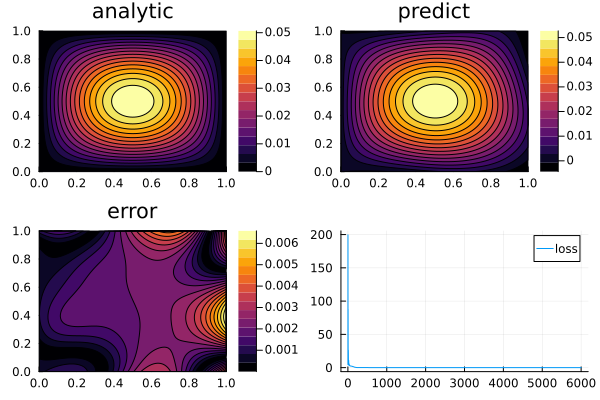

In [2]:
xs, ys = [infimum(d.domain):(dx / 10):supremum(d.domain) for d in domains]
analytic_sol_func(x, y) = (sin(pi * x) * sin(pi * y)) / (2pi^2)

u_predict = reshape([first(phi([x, y], res.minimizer)) for x in xs for y in ys],
                    (length(xs), length(ys)))
u_real = reshape([analytic_sol_func(x, y) for x in xs for y in ys],
                 (length(xs), length(ys)))
diff_u = abs.(u_predict .- u_real)

using Plots
p1 = plot(xs, ys, u_real, linetype = :contourf, title = "analytic");
p2 = plot(xs, ys, u_predict, linetype = :contourf, title = "predict");
p3 = plot(xs, ys, diff_u, linetype = :contourf, title = "error");
p4 = plot(loss, label="loss")
plot(p1, p2, p3, p4)